In [1]:
import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pydataset import data
from scipy import stats
# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer
#import acquire
from acquire import get_titanic_data , get_iris_data
import prepare

### 1. use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [412]:
df_iris = data('iris')

In [413]:
# get info about dataset
data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [4]:
#import from seaborn
#iris = sns.load_dataset('iris')

- print the first 3 rows

In [5]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


- print the number of rows and columns (shape)

In [6]:
df_iris.shape

(150, 5)

- print the column names

In [7]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [8]:
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

- print the data type of each column

In [9]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [10]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

- print the summary statistics for each of the numeric variables.
Would you recommend rescaling the data based on these statistics? no, 

I would not recommend rescaling because the iris data set gives the measurements in centimeters of the variables.

In [11]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
stats = df_iris.describe().T

### 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [13]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [14]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


- assign the first 100 rows to a new dataframe, df_excel_sample

In [15]:
df_excel_sample = df_excel.head(100)

- print the number of rows of your original dataframe

In [16]:
df_excel.shape[0]

7049

- print the first 5 column names

In [17]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

- print the column names that have a data type of object

In [18]:
df_excel.select_dtypes(include = "object").columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [19]:
df_excel.select_dtypes(include = "object").head()

,customer_id,gender,partner,dependents,payment_type,churn
0,0002-ORFBO,Female,Yes,Yes,Mailed check,No
1,0003-MKNFE,Male,No,No,Mailed check,No
2,0004-TLHLJ,Male,No,No,Electronic check,Yes
3,0011-IGKFF,Male,Yes,No,Electronic check,Yes
4,0013-EXCHZ,Female,Yes,No,Mailed check,Yes


- compute the range for each of the numeric variables.

In [20]:
df_excel.select_dtypes(include = "number").columns

Index(['is_senior_citizen', 'phone_service', 'internet_service',
       'contract_type', 'monthly_charges', 'total_charges'],
      dtype='object')

In [21]:
df_excel.select_dtypes(include = "number").max()

is_senior_citizen       1.00
phone_service           2.00
internet_service        2.00
contract_type           2.00
monthly_charges       118.75
total_charges        8684.80
dtype: float64

In [22]:
df_excel.select_dtypes(include = "number").max() - df_excel.select_dtypes(include = "number").min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

### 3. Read the data from this google sheet into a dataframe, df_google

In [23]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [24]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
# if  it's a shared link, the replace function needs to be: 
#df.replace(‘/edit?usp=sharing’, ‘/export?format=csv&gid=341089357’)

In [25]:
df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- print the first 3 rows

In [26]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- print the number of rows and columns

In [27]:
df_google.shape

(891, 12)

- print the column names

In [28]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- print the data type of each column

In [29]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- print the summary statistics for each of the numeric variables

In [30]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- print the unique values for each of your categorical variables

In [32]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [33]:
df_google.select_dtypes(include = "object").nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [34]:
df_google.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [35]:
df_google.select_dtypes(include = "object").columns.unique()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [36]:
pd.unique(df_google.select_dtypes(include = "object").columns)

array(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype=object)

### 3. Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [37]:
df2 = get_titanic_data()

In [38]:
df2.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [39]:
df3 = get_iris_data()

In [40]:
df3.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


# Prepare Data

### - Using the Iris Data:

### - Use the function defined in acquire.py to load the iris data.

In [41]:

iris_df = get_iris_data()

In [42]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


### - Drop the species_id and measurement_id columns.

In [43]:
#here I'm using a new variable for df just to do the exercises and not change the original iris_df 
df = iris_df.drop(columns= ['species_id','measurement_id'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### - Rename the species_name column to just species.

In [44]:

df.rename(columns={"species_name": "species"}, inplace =True)

In [45]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### -  Create dummy variables of the species name.

In [46]:
# we drop the first dummy column because it is a redundant feature.
dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True])

In [47]:
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [48]:
#chec the titles how are diferents from above
dum_df = pd.get_dummies(df.species, drop_first=True)
dum_df.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [49]:
#  concat dummy_df with my df
df = pd.concat([df, dummy_df], axis =1)

In [50]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


### - Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [51]:
def prep_iris(df):
    '''
    takes in a iris df that was  acquired before  and return a cleaned
    dataframe: dropeed species_id and measurement_id columns, renamed species_name
    and created dummy variables of the species name
    '''
    #drop columns
    df = df.drop(columns= ['species_id','measurement_id'])
    #rename columns
    df.rename(columns={"species_name": "species"}, inplace =True)
    #create dummy variables of the species name
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True])
    #  concat dummy_df with my df
    df = pd.concat([df, dummy_df], axis =1)
    return df
    
    
    

In [52]:
prep_iris(iris_df).head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,0,0
9,4.9,3.1,1.5,0.1,setosa,0,0


## Prepare Titanic Data - Challenge/Bonus Exercises

### - 2.1  Use the function you defined in acquire.py to load the titanic dataset.

In [53]:
titanic_df = get_titanic_data()

In [54]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [55]:
titanic_df.shape

(891, 13)

In [56]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


### - 2.2  Handle the missing values in the embark_town and embarked columns.

In [57]:
#checking null values
titanic_df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [58]:
miss_values = titanic_df.isnull().sum()
miss_values[miss_values > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [59]:
titanic_df['embarked'].isnull().sum()

2

In [60]:
# check the values in embar_town and embarked. we can see they have the same values


In [61]:
titanic_df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [62]:
titanic_df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [63]:
titanic_df[titanic_df.embarked.isnull()]

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
61,61,1,1,female,38.0,0,0,80.0,NaN,First,B,NaN,1
829,829,1,1,female,62.0,0,0,80.0,NaN,First,B,NaN,1


In [64]:
titanic_df[titanic_df.embark_town.isnull()]

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
61,61,1,1,female,38.0,0,0,80.0,NaN,First,B,NaN,1
829,829,1,1,female,62.0,0,0,80.0,NaN,First,B,NaN,1


In [65]:
# we are going to eliminate embark_town as has the same value as embarked

In [66]:
titanic_df.drop(columns = 'embark_town', inplace= True)

In [67]:
#we are going to fill the null values with the most common value: S
titanic_df['embarked'] = titanic_df.embarked.fillna(value = 'S')

In [68]:
##if you want to eliminate the nulls
# using the complement operator, ~, to return the inverse of our instance above.
#Return everything but the null values.

#titanic_df[~titanic_df.embarked.isnull()]

In [69]:
#check if we fill the nulls

In [70]:
titanic_df['embarked'].isnull().sum()

0

In [71]:
titanic_df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

### - 2.3  Remove the deck column.

In [72]:
titanic_df.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,0,3,male,22.0,1,0,7.25,S,Third,NaN,0


In [73]:
titanic_df.drop(columns = 'deck', inplace= True)

In [74]:
titanic_df.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,0,3,male,22.0,1,0,7.25,S,Third,0


In [75]:
titanic_df.shape

(891, 11)

### - 2.4  Create a dummy variable of the embarked column.

In [76]:
dummy_tdf = pd.get_dummies(titanic_df[['embarked']], dummy_na=False, drop_first=[True])

In [77]:
dummy_tdf.head()


,embarked_Q,embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [78]:
# see the diference if you do this  titanic.embarked the name of the Columns : Q , S
pd.get_dummies(titanic_df.embarked, drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [79]:
titanic_df = pd.concat([titanic_df, dummy_tdf], axis =1)

In [80]:
titanic_df.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.25,S,Third,0,0,1


### - 2.5  Split Data

In [81]:
train_validate, test = train_test_split(titanic_df, test_size=.2, random_state=123, stratify=titanic_df.survived)

In [82]:
train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)

In [83]:
train.shape , validate.shape, test.shape

((498, 13), (214, 13), (179, 13))

### - 2.5.1  Create a helper function to split titanic data into train, validate, test datasets

In [84]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    return train, validate, test

In [85]:
train, validate, test = split_data(titanic_df)

### - 2.6  Fill or impute the missing values in age.

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  498 non-null    int64  
 1   survived      498 non-null    int64  
 2   pclass        498 non-null    int64  
 3   sex           498 non-null    object 
 4   age           401 non-null    float64
 5   sibsp         498 non-null    int64  
 6   parch         498 non-null    int64  
 7   fare          498 non-null    float64
 8   embarked      498 non-null    object 
 9   class         498 non-null    object 
 10  alone         498 non-null    int64  
 11  embarked_Q    498 non-null    uint8  
 12  embarked_S    498 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(2)
memory usage: 47.7+ KB


In [87]:

# We have 97 observations missing a value in the age column.
train['age'].isnull().sum()

97

In [88]:
#let's check the values on the age
train.age.value_counts(dropna = False, sort= False, ascending= True).sort_index()

0.42      1
0.67      1
0.75      2
0.83      1
1.00      5
2.00      5
3.00      4
4.00      3
5.00      2
6.00      1
7.00      2
8.00      1
9.00      6
10.00     1
13.00     2
14.00     2
15.00     2
16.00     9
17.00     7
18.00    17
19.00    13
20.00     7
20.50     1
21.00    16
22.00    15
23.00    12
23.50     1
24.00    17
24.50     1
25.00    16
26.00    12
27.00    13
28.00    19
28.50     2
29.00     4
30.00    12
31.00     9
32.00    10
32.50     1
33.00     9
34.00    10
34.50     1
35.00     8
36.00    10
36.50     1
37.00     4
38.00     8
39.00     7
40.00     7
41.00     4
42.00     8
43.00     2
44.00     6
45.00     8
45.50     2
46.00     1
47.00     3
48.00     2
49.00     3
50.00     6
51.00     4
52.00     3
54.00     4
55.00     2
56.00     2
58.00     3
59.00     1
60.00     2
61.00     2
62.00     2
63.00     2
64.00     1
65.00     1
66.00     1
70.00     1
70.50     1
71.00     2
74.00     1
80.00     1
NaN      97
Name: age, dtype: int64

In [89]:
#for the stategy,  I choose 'median'
imputer = SimpleImputer(missing_values = np.nan, strategy='median')

In [90]:

# Fit the imputer to train 
imputer = imputer.fit(train[['age']])

In [91]:
#transform.
train[['age']] = imputer.transform(train[['age']])

validate[['age']] = imputer.transform(validate[['age']])

test[['age']] = imputer.transform(test[['age']])

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  498 non-null    int64  
 1   survived      498 non-null    int64  
 2   pclass        498 non-null    int64  
 3   sex           498 non-null    object 
 4   age           498 non-null    float64
 5   sibsp         498 non-null    int64  
 6   parch         498 non-null    int64  
 7   fare          498 non-null    float64
 8   embarked      498 non-null    object 
 9   class         498 non-null    object 
 10  alone         498 non-null    int64  
 11  embarked_Q    498 non-null    uint8  
 12  embarked_S    498 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(2)
memory usage: 47.7+ KB


### - 2.6.1  Build a helper function for imputing

In [93]:
def impute_mode(train, validate, test, column , method):
    '''
    impute a choosen strategy (method) for age column into observations with missing values.
    column:  is the column to impute or fill the missing values in  
    method:  is the type of strategy(media, media, most_frequent)
    '''
    imputer = SimpleImputer(strategy= method, missing_values= np.nan)
    train[[column]] = imputer.fit_transform(train[[column]])
    validate[[column]] = imputer.transform(validate[[column]])
    test[[column]] = imputer.transform(test[[column]])
    return train, validate, test

In [94]:
impute_mode(train, validate, test, column = 'embarked', method = 'most_frequent')

(     passenger_id  survived  pclass     sex   age  sibsp  parch      fare  \
 583           583         0       1    male  36.0      0      0   40.1250   
 165           165         1       3    male   9.0      0      2   20.5250   
 50             50         0       3    male   7.0      4      1   39.6875   
 259           259         1       2  female  50.0      0      1   26.0000   
 306           306         1       1  female  28.0      0      0  110.8833   
 ..            ...       ...     ...     ...   ...    ...    ...       ...   
 313           313         0       3    male  28.0      0      0    7.8958   
 636           636         0       3    male  32.0      0      0    7.9250   
 222           222         0       3    male  51.0      0      0    8.0500   
 485           485         0       3  female  28.0      3      1   25.4667   
 744           744         1       3    male  31.0      0      0    7.9250   
 
     embarked   class  alone  embarked_Q  embarked_S  
 583   

### - 2.7  Create a prep_titanic function that accepts the untransformed titanic data and returns the data with the transformations above applied.

In [350]:
df = get_titanic_data()

In [351]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [96]:
def prep_titanic_data(df, column, method ,dummies):
    '''
    takes in a dataframe of the titanic dataset that was  acquired before and returns a cleaned dataframe
    arguments:
    - df: a pandas DataFrame with the expected feature names and columns
    - column : the name of the column to fill or impute the missing values in
    - method: type of strategy (median, mean, most_frequent) for SimpleImputer
    - dummies: list of columns to create a dummy variable 
    return: 
    train, validate, test (three dataframes with the cleaning operations performed on them)
    '''
    #clean data
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embark_town'])
    
    #create a dummy df
    dummy_df = pd.get_dummies(df[dummies], dummy_na=False, drop_first=[True, True])
    ## Concatenate the dummy_df dataframe above with the original df
    df = pd.concat([df, dummy_df], axis=1)
    
    # drop the deck column
    df = df.drop(columns= dummies)
    #split data
    
    # split data into train, validate, test dfs
    train, validate, test = split_data(df)

    # impute the chosen strategy (median)  for  the selected column (age) into null values in age column
    train, validate, test = impute_mode(train, validate, test, column , method)
   
    return train, validate, test

In [352]:
train, validate, test= prep_titanic_data(df, column = 'age', method = 'median', dummies = ['embarked', 'sex'])

In [353]:
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,class,alone,embarked_Q,embarked_S,sex_male
583,583,0,1,36.0,0,0,40.1250,First,1,0,0,1
165,165,1,3,9.0,0,2,20.5250,Third,0,0,1,1
50,50,0,3,7.0,4,1,39.6875,Third,0,0,1,1
259,259,1,2,50.0,0,1,26.0000,Second,0,0,1,0
306,306,1,1,28.0,0,0,110.8833,First,1,0,0,0


In [99]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (498, 12)
validate -> (214, 12)
test -> (179, 12)


#  DATA EXPLORATION

### Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

***Exercise from Explore lesson***

**1. Split your data into train, validate, and test samples..**

In [2]:
#get the iris dataset
iris_df = get_iris_data()

In [3]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [4]:
#prepare data

iris_p = prepare.prep_iris(iris_df)

In [5]:
iris_p.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [ ]:
#we don't need species_versicolor, and species_virginica

In [7]:
iris_p.drop(columns = ['species_versicolor', 'species_virginica'], inplace = True)

In [8]:
iris_p.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [9]:
#split using my function iris_split_data

In [10]:
i_train, i_validate, i_test = prepare.iris_split_data(iris_p)

In [11]:
i_train.shape, i_validate.shape, i_test.shape

((84, 5), (36, 5), (30, 5))

In [12]:
i_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


**2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.**

In [15]:
itrain_melt = i_train.melt(id_vars='species', var_name="measurement", value_name = "value" )

In [16]:
itrain_melt.head()

,species,measurement,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


In [17]:
itrain_melt.shape

(336, 3)

In [18]:
itrain_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   species      336 non-null    object 
 1   measurement  336 non-null    object 
 2   value        336 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


In [19]:
plt.rc('font', size = 14)
plt.rc('figure', figsize =(14,10))

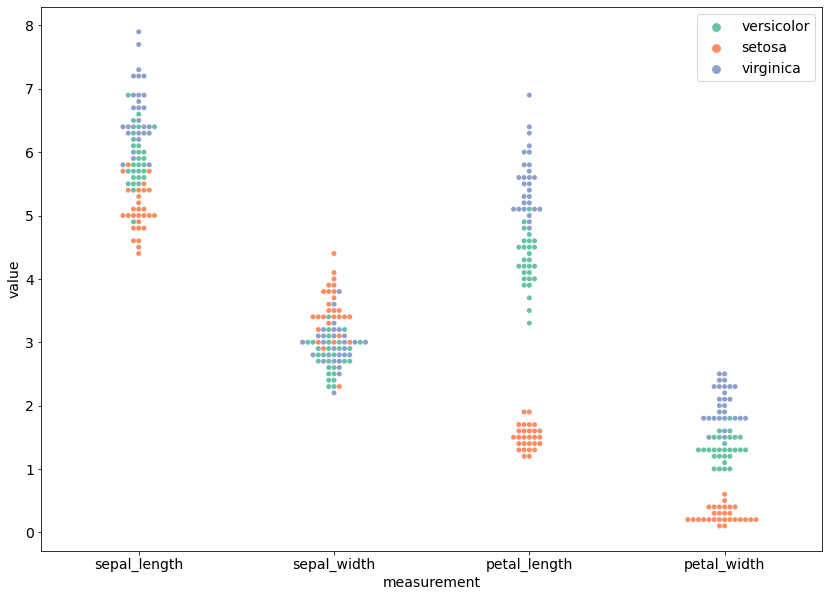

In [20]:
sns.swarmplot(x='measurement', y = 'value', data = itrain_melt, hue = 'species', palette = 'Set2')
plt.legend()
plt.show()

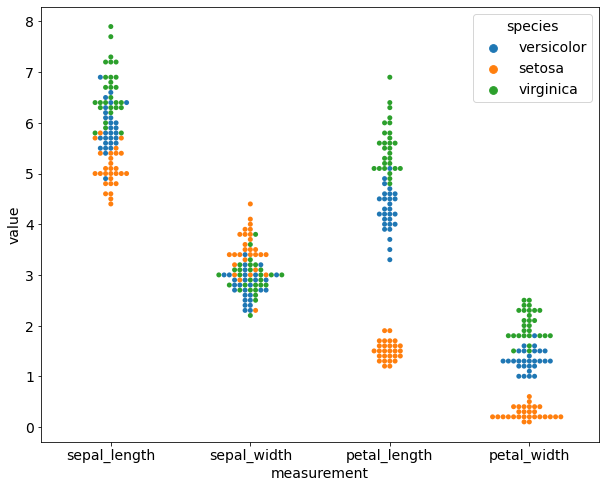

In [21]:
plt.figure(figsize=(10,8))
p = sns.swarmplot(
x='measurement',
y='value',
hue='species',
data= itrain_melt)

plt.show()

Takeaways
Setosa has a big difference in petal lenght and petal width comprared to the other species.
virginica has the largest petals
setosa has the smallest petas


**3. Create 4 subplots (2 rows x 2 columns) of scatterplots.**

- sepal_length x sepal_width

- petal_length x petal_width

- sepal_area x petal_area

- sepal_length x petal_length

- What are your takeaways?

In [22]:
#calculate the area

In [23]:
i_train['sepal_area'] = i_train['sepal_length'] * i_train['sepal_width']
i_train['petal_area'] = i_train['petal_length'] * i_train['petal_length']

In [24]:
i_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,12.25
36,5.5,3.5,1.3,0.2,setosa,19.25,1.69
133,6.3,2.8,5.1,1.5,virginica,17.64,26.01
95,5.7,3.0,4.2,1.2,versicolor,17.10,17.64
18,5.7,3.8,1.7,0.3,setosa,21.66,2.89


******************review**************

In [45]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area','petal_area'),
    ('sepal_length','petal_length')
]

In [46]:
combos[0]

('sepal_length', 'sepal_width')

In [47]:
i_train.groupby('species')['sepal_area'].sum()

species
setosa        497.30
versicolor    463.09
virginica     551.46
Name: sepal_area, dtype: float64

In [48]:
x= combos [0][0]
y= combos [0][1]
def scatter_species (x,y):
    for species, subset in i_train.groupby('species'):
        plt.scatter(subset[x], subset[y], label= species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

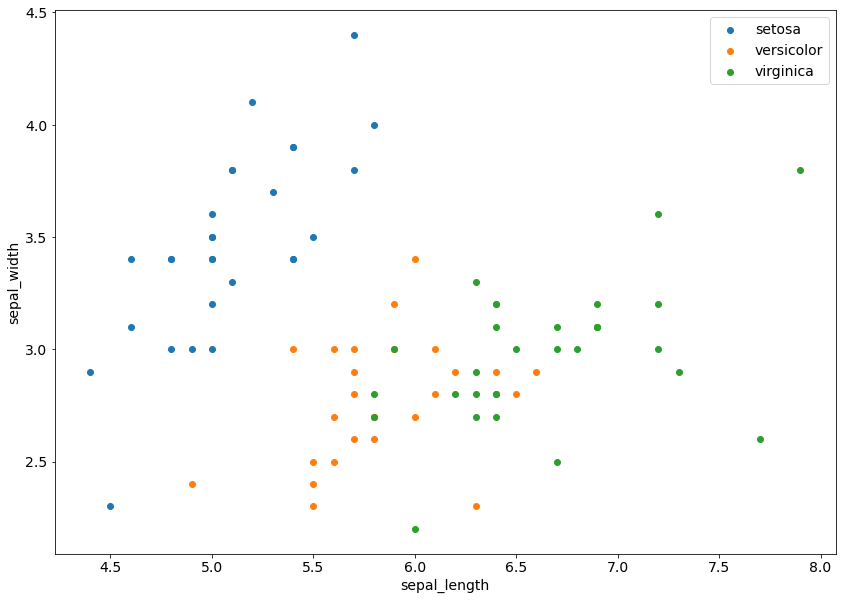

In [49]:
#test it with one plot
scatter_species (x,y)

In [50]:
#check what this func does with enumerete
for i, pair in enumerate (combos):
    print(i)
    print(pair)

0
('sepal_length', 'sepal_width')
1
('petal_length', 'petal_width')
2
('sepal_area', 'petal_area')
3
('sepal_length', 'petal_length')


IndexError: tuple index out of range

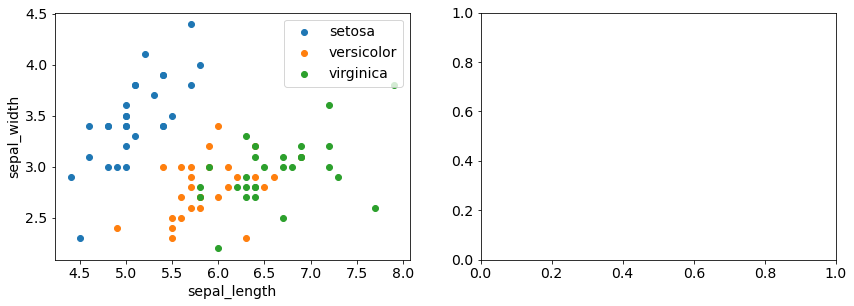

In [55]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])

plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[0][2])

plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[0][3])

plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[0][4])



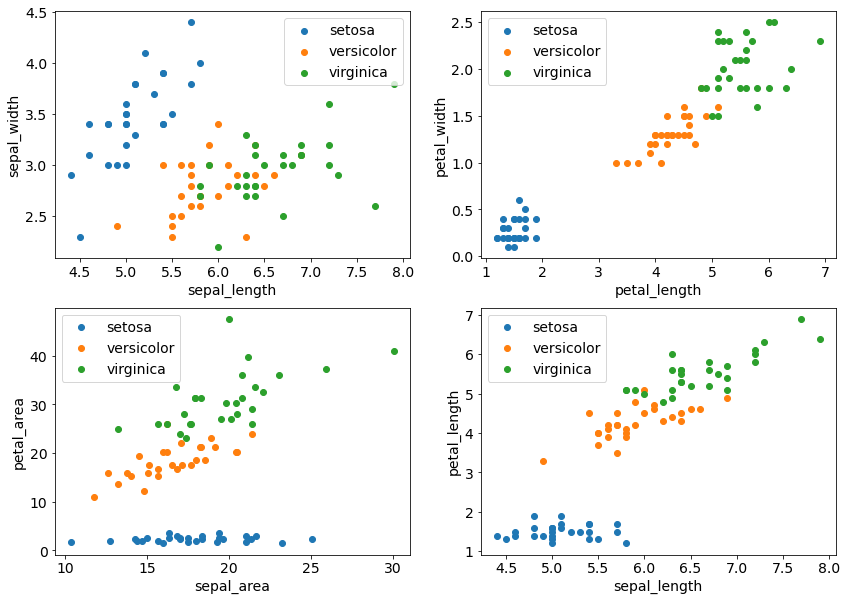

In [52]:
for i, pair in enumerate (combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

In [53]:
#check what this func does with enumerete
for i, pair in enumerate (combos):
    print(i)
    print(pair)

0
('sepal_length', 'sepal_width')
1
('petal_length', 'petal_width')
2
('sepal_area', 'petal_area')
3
('sepal_length', 'petal_length')


***************************************************************

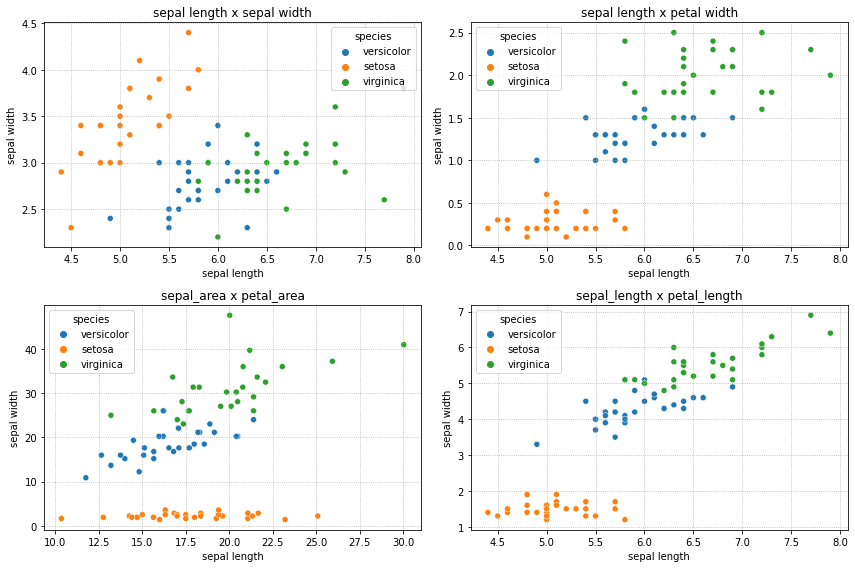

In [16]:
#initial formatting
plt.figure(figsize = (12,8))

#sepal_length x sepal_width
plt.subplot(2,2,1)
plt.title('sepal length x sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=i_train)

#petal_length x petal_width
plt.subplot(2,2,2)
plt.title('sepal length x petal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=i_train)


#sepal_area x petal_area
plt.subplot(2,2,3)
plt.title('sepal_area x petal_area')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_area', y='petal_area', hue='species', data=i_train)

#sepal_length x petal_length
plt.subplot(2,2,4)
plt.title('sepal_length x petal_length')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=i_train)

plt.tight_layout()
plt.show()

**4. Create a heatmap of each variable layering correlation coefficient on top.**

**** review *****

In [56]:
i_train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.896824
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.400225
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.984797
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.945786
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.352390
petal_area,0.896824,-0.400225,0.984797,0.945786,0.352390,1.000000


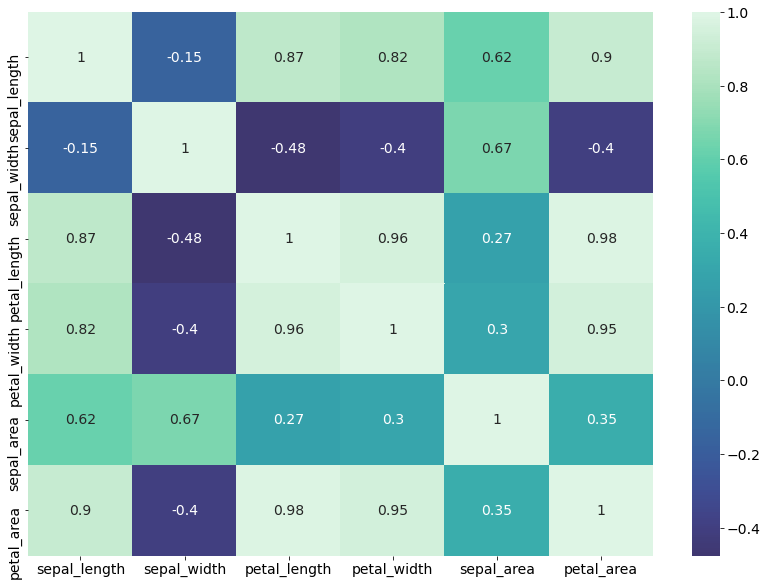

In [57]:
sns.heatmap(i_train.corr(), cmap='mako', center=0, annot=True)
plt.show()

In [58]:
pd.crosstab(i_train.species, i_train.sepal_width, margins = True)

sepal_width,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,...,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.4,All
species,,,,,,,,,,,,,,,,,,,,,
setosa,0,1,0,0,0,0,0,1,3,1,...,7,3,1,1,3,2,1,1,1,28
versicolor,0,2,2,2,2,4,3,4,5,1,...,1,0,0,0,0,0,0,0,0,28
virginica,1,0,0,1,1,3,5,2,5,4,...,0,0,1,0,1,0,0,0,0,28
All,1,3,2,3,3,7,8,7,13,6,...,8,3,2,1,4,2,1,1,1,84


<AxesSubplot:>

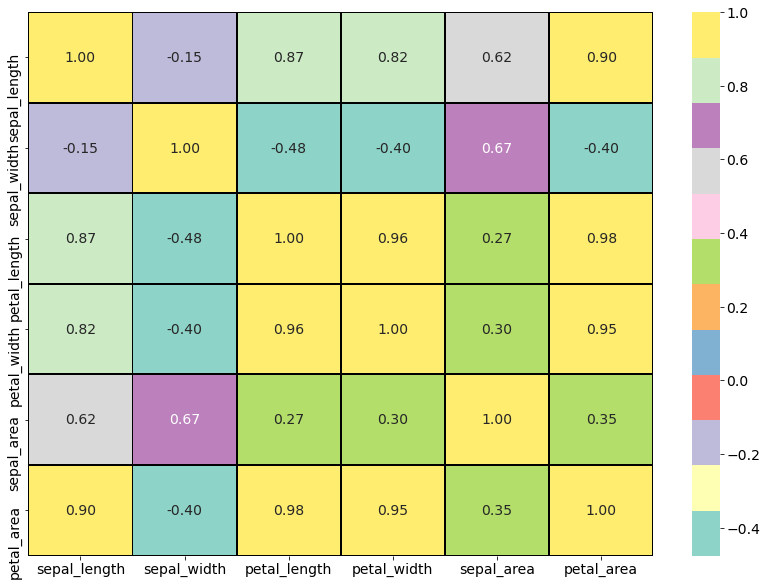

In [60]:
sns.heatmap(i_train.corr(), cmap= 'Set3',  linewidth= 1, linecolor= 'k', annot= True, fmt='.2f')

**5. Create a scatter matrix visualizing the interaction of each variable.**

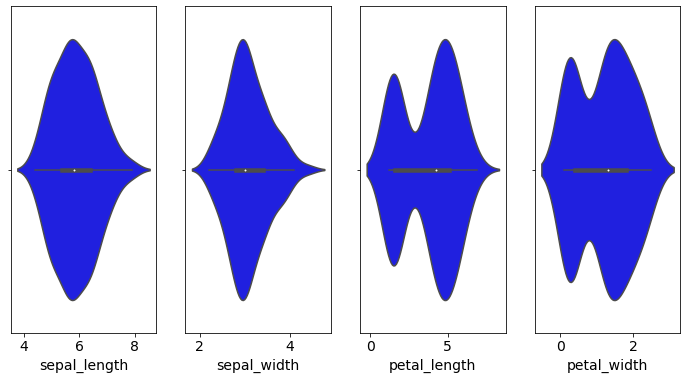

In [61]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
_, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (12,6), sharey =True)

for i, feature in enumerate(features):
    sns.violinplot(
    feature, 
    hue = 'species',
    data = i_train,
    split = True,
    ax =ax[i],
    palette = ['blue', 'orange'])

In [62]:
i_train.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,12.25


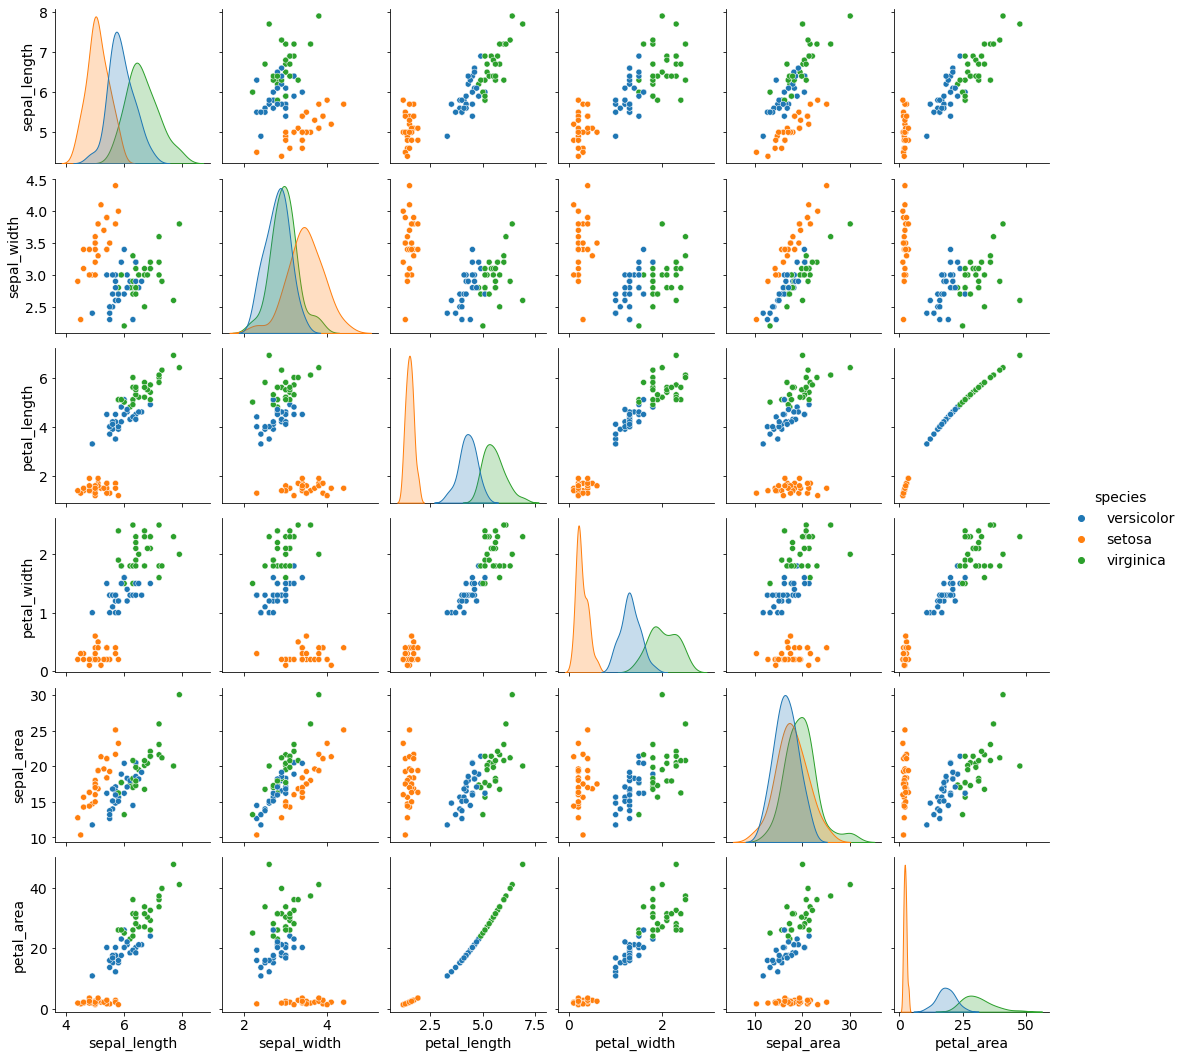

In [66]:
#it can takes a long time to process 
sns.pairplot(i_train, hue="species")
plt.show()

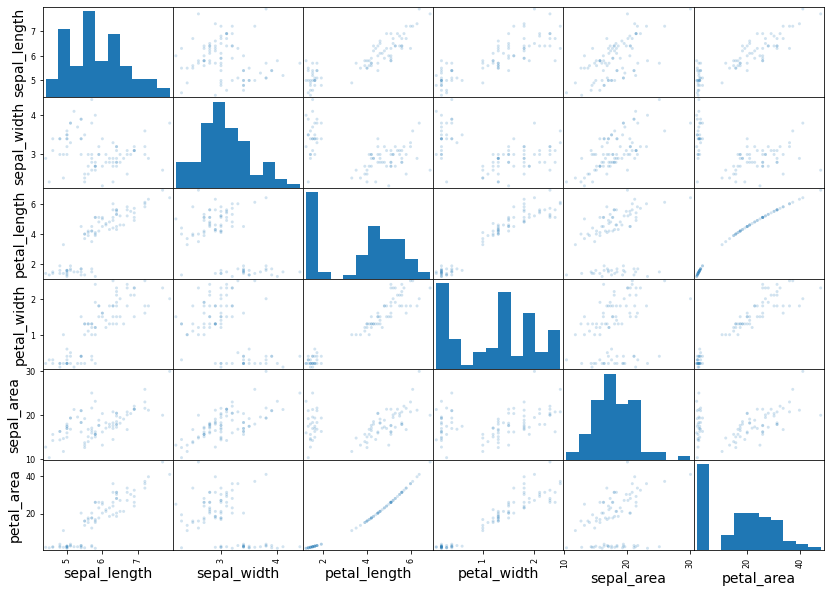

In [67]:
pd.plotting.scatter_matrix(i_train, alpha=0.2)
plt.show()

**6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.**

- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

- What is your takeaway from this statistical testing?

- $H_{0}$: the sepal lenght  is the same  in   virginica and versicolor 
- $H_{a}$:  the sepal lenght  is singnificant different between  virginica and versicolor.

In [69]:
i_train.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.82,12.25


In [70]:
i_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
 5   sepal_area    84 non-null     float64
 6   petal_area    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.2+ KB


In [71]:
# all are cont. except species

In [72]:
x= i_train[i_train.species == 'virginica'].sepal_length.dropna()
y = i_train[i_train.species == 'versicolor'].sepal_length.dropna()

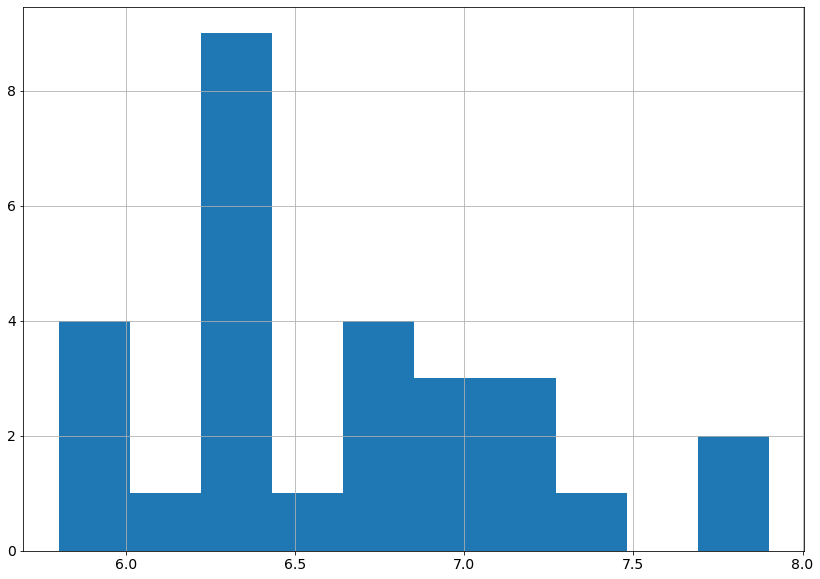

In [73]:
#virginica
x.hist()
plt.show()

(0.1295564478755326, 0.5111354634944449)

False

In [75]:
# Two sapmplet-test 2 tailed test
vir= i_train[i_train.species == 'virginica'].sepal_length
vers= i_train[i_train.species == 'versicolor'].sepal_length


In [76]:
#check the variance 
vir.var(), vers.var()

(0.283425925925926, 0.18109788359788362)

In [79]:
alpha= 0.05

t, p = stats.ttest_ind(vir, vers, equal_var = False)
t, p

(5.656491804882077, 6.856736413800083e-07)

In [80]:
if (p< alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [81]:
stat, p = stats.mannwhitneyu(vir,vers)
stat, p

(107.5, 1.541014598267054e-06)

**7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.**

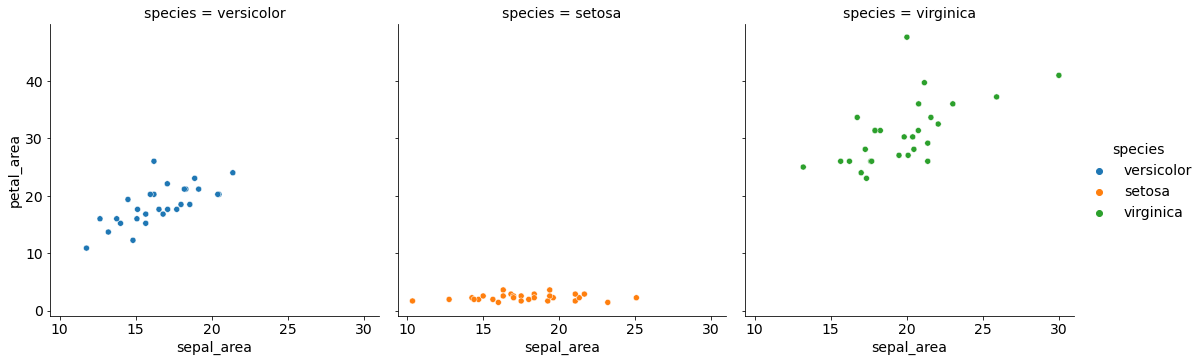

In [82]:
sns.relplot(x='sepal_area', y = 'petal_area', hue='species', data=i_train, col = 'species', kind = 'scatter')

## ---------------------------------------------------------------------------------------------------------

## Exercises from the curriculum 

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

**1. Acquire, prepare & split your data.**

In [26]:
#acquire
iris_df = get_iris_data()

In [27]:
iris_df.head(1)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa


In [28]:
#prepare
iris_p = prepare.prep_iris(iris_df)
iris_p.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [29]:
#split
i_train, i_validate, i_test = prepare.iris_split_data(iris_p)

In [30]:
i_train.shape, i_validate.shape, i_test.shape

((84, 7), (36, 7), (30, 7))

In [31]:
i_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


In [32]:
i_validate.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
134,6.1,2.6,5.6,1.4,virginica,0,1
62,6.0,2.2,4.0,1.0,versicolor,1,0
98,5.1,2.5,3.0,1.1,versicolor,1,0
66,5.6,3.0,4.5,1.5,versicolor,1,0
121,5.6,2.8,4.9,2.0,virginica,0,1


In [33]:
i_test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
80,5.5,2.4,3.8,1.1,versicolor,1,0
45,4.8,3.0,1.4,0.3,setosa,0,0
144,6.7,3.3,5.7,2.5,virginica,0,1
110,6.5,3.2,5.1,2.0,virginica,0,1
38,4.4,3.0,1.3,0.2,setosa,0,0


**2. Univariate Stats**

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

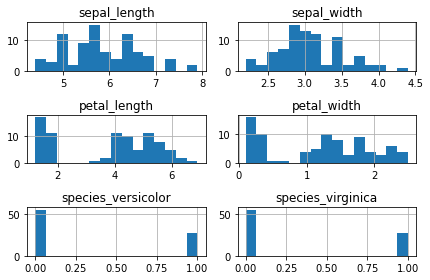

In [34]:
#using density =True gives you percentage

i_train.hist(bins = 15, density = False)

plt.tight_layout()
plt.show()

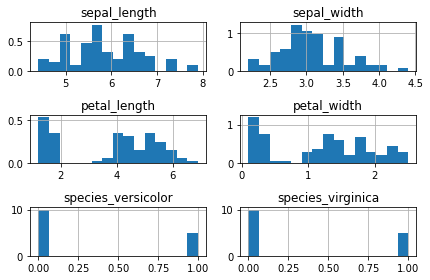

In [35]:
i_train.hist(bins = 15, density = True)
plt.tight_layout()
plt.show()

In [36]:
i_train.species_versicolor.value_counts()

0    56
1    28
Name: species_versicolor, dtype: int64

In [37]:
#i_train.petal_length.value_counts().sort_index()

<AxesSubplot:>

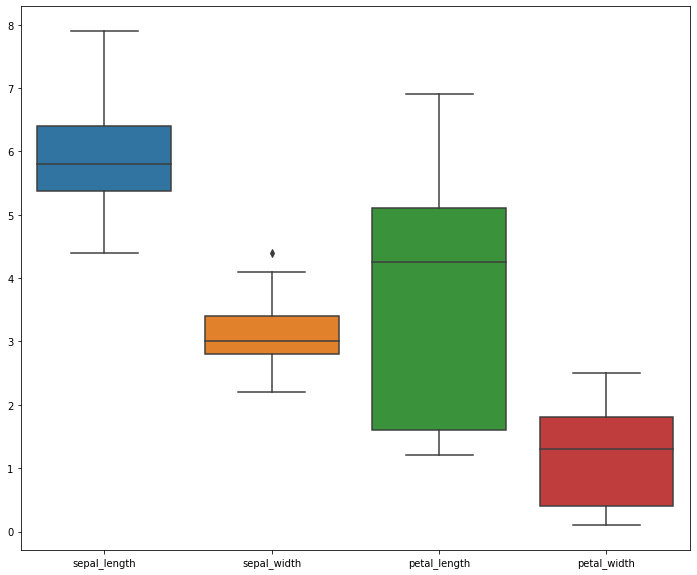

In [38]:
plt.figure(figsize = (12,10))
sns.boxplot(data=i_train.drop(columns = ['species_versicolor', 'species_virginica']))

In [39]:
# i'm getting the list of columns with a float type
col = list(i_train.select_dtypes('float').columns)
col


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

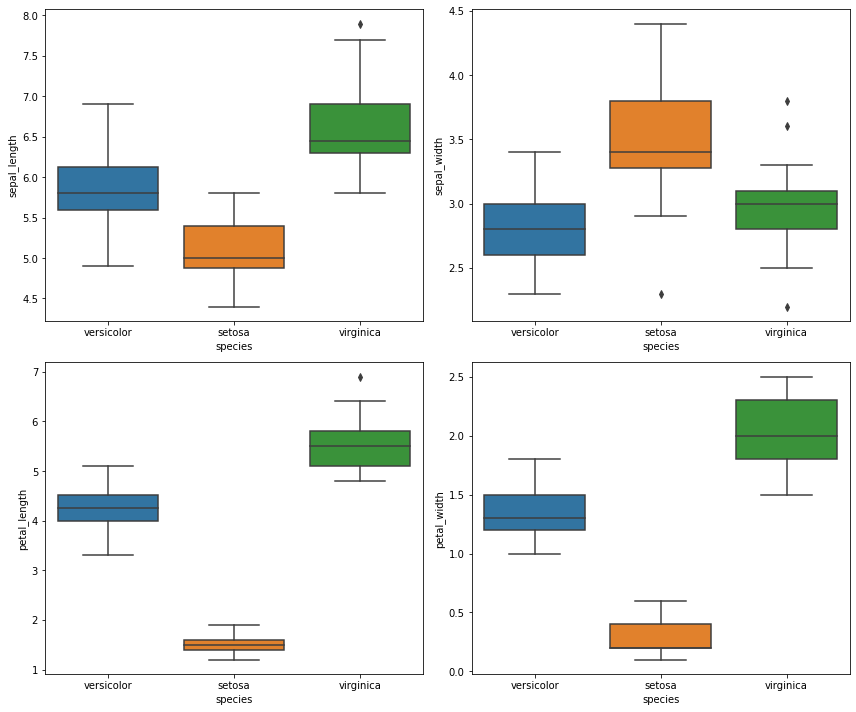

In [40]:
plt.figure(figsize = (12,10))
x=0
for cat in col:
    x+=1
    plt.subplot(2,2,x)
    sns.boxplot(x ='species' , y= cat, data=i_train)
    
plt.tight_layout()    
plt.show()

In [41]:
type(i_train.drop(columns = ['species_versicolor', 'species_virginica']))

pandas.core.frame.DataFrame

In [42]:
 i_train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


In [43]:
i_train.drop(columns = ['species_versicolor', 'species_virginica']).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [44]:
i_train.species.value_counts()

virginica     28
versicolor    28
setosa        28
Name: species, dtype: int64

In [45]:
i_train.species.value_counts(normalize= True)

virginica     0.333333
versicolor    0.333333
setosa        0.333333
Name: species, dtype: float64

In [46]:
i_validate.species.value_counts()

versicolor    12
setosa        12
virginica     12
Name: species, dtype: int64

In [47]:
i_test.species.value_counts()

versicolor    10
virginica     10
setosa        10
Name: species, dtype: int64

In [48]:
pd.crosstab(index= i_train['species'],columns = 'count').reset_index()

col_0,species,count
0,setosa,28
1,versicolor,28
2,virginica,28


In [49]:
pd.crosstab(index= i_train['species'],columns = 'count', normalize = True).reset_index()

col_0,species,count
0,setosa,0.333333
1,versicolor,0.333333
2,virginica,0.333333


- Document takeaways & any actions.

**3. Bivariate Stats**
-  Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [50]:
# i'm getting the list of columns with a float type 
col = list(i_train.select_dtypes('float').columns)

In [51]:
#the mean for each measurement type
i_train[col].mean()

sepal_length    5.870238
sepal_width     3.075000
petal_length    3.771429
petal_width     1.203571
dtype: float64

In [52]:
#the overall mean
i_train[col].mean().mean()

3.4800595238095244

In [53]:
# i'm getting the list of columns with a float type so I can use is in a for loop
col = list(i_train.select_dtypes('float').columns)
col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

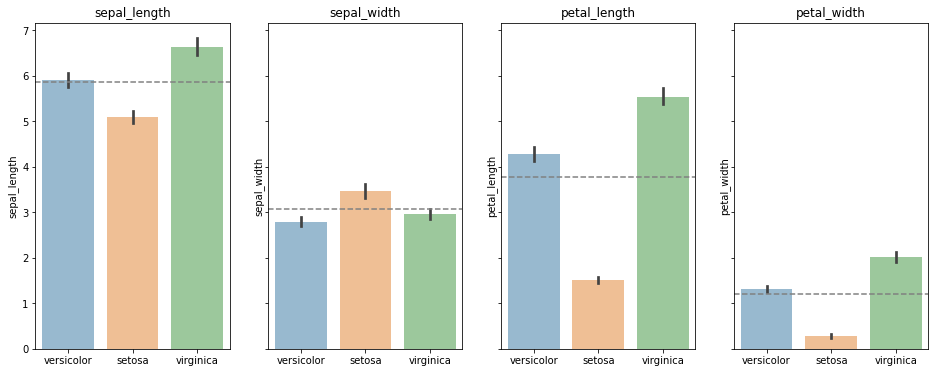

In [54]:

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(col):
    overall_mean = i_train[feature].mean()
    sns.barplot( 'species',feature, data= i_train, ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(feature)
    ax[i].set_title(feature)
    ax[i].axhline(overall_mean, ls='--', color='grey')

*********** just for fun *********************

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

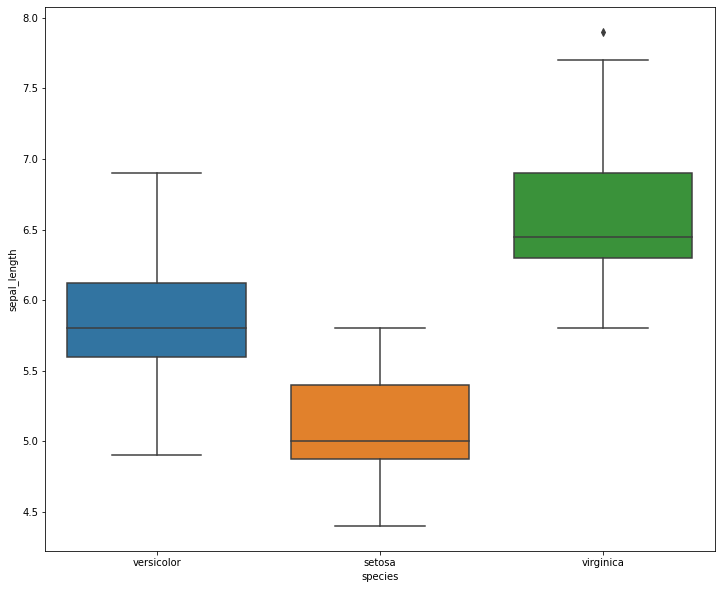

In [55]:
plt.figure(figsize = (12,10))
sns.boxplot(x ='species' , y= 'sepal_length', data=i_train)

In [56]:
# i'm getting the list of columns with a float type
col = list(i_train.select_dtypes('float').columns)
col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

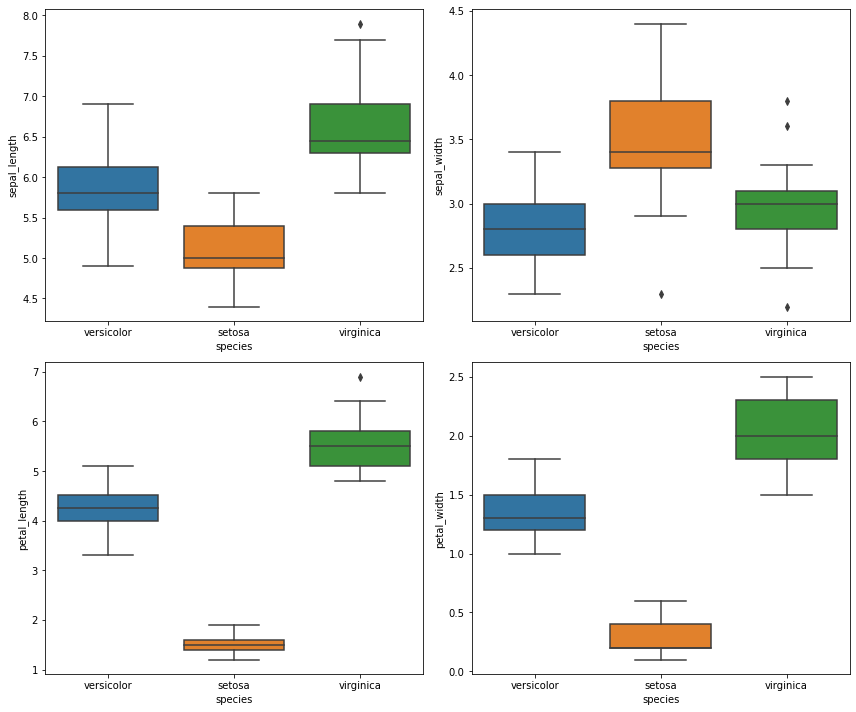

In [57]:
plt.figure(figsize = (12,10))
x=0
for cat in col:
    x+=1
    plt.subplot(2,2,x)
    sns.boxplot(x ='species' , y= cat, data=i_train)
    
plt.tight_layout()    
plt.show()

**- For each measurement type, compute the descriptive statistics for each species.**

In [58]:
i_train[col].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [59]:
#getting only the petal_width for virginica and versicolor
x = i_train[i_train.species == 'versicolor'].petal_width
y = i_train[i_train.species == 'virginica'].petal_width

In [60]:
stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=17.0, pvalue=3.235595834904965e-10)

- Document takeaways & any actions.

**4. Multivariate Stats**

**- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.**

<Figure size 1440x1440 with 0 Axes>

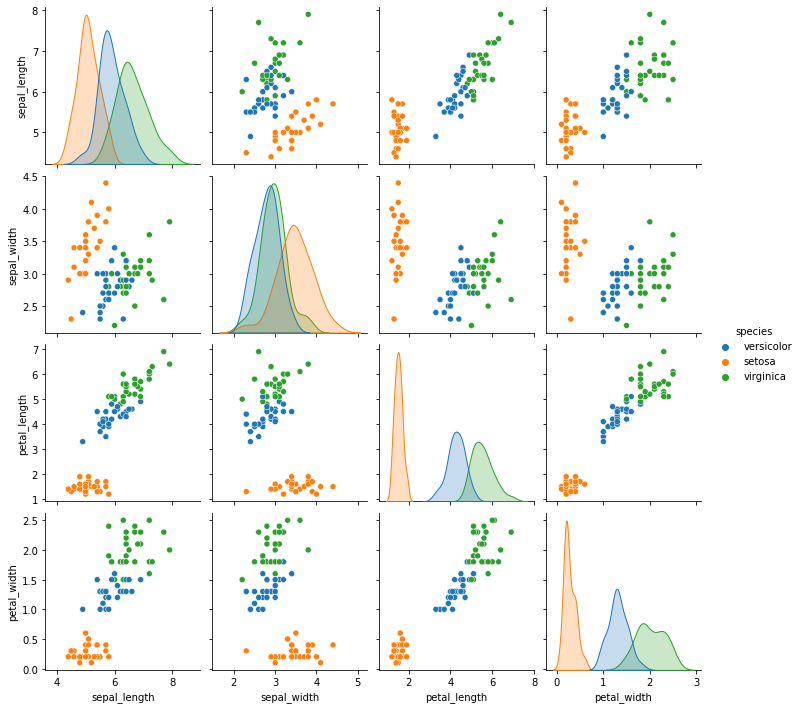

In [61]:
plt.figure(figsize = (20,20))
sns.pairplot(i_train.drop(columns = ['species_versicolor', 'species_virginica']), hue= 'species')

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

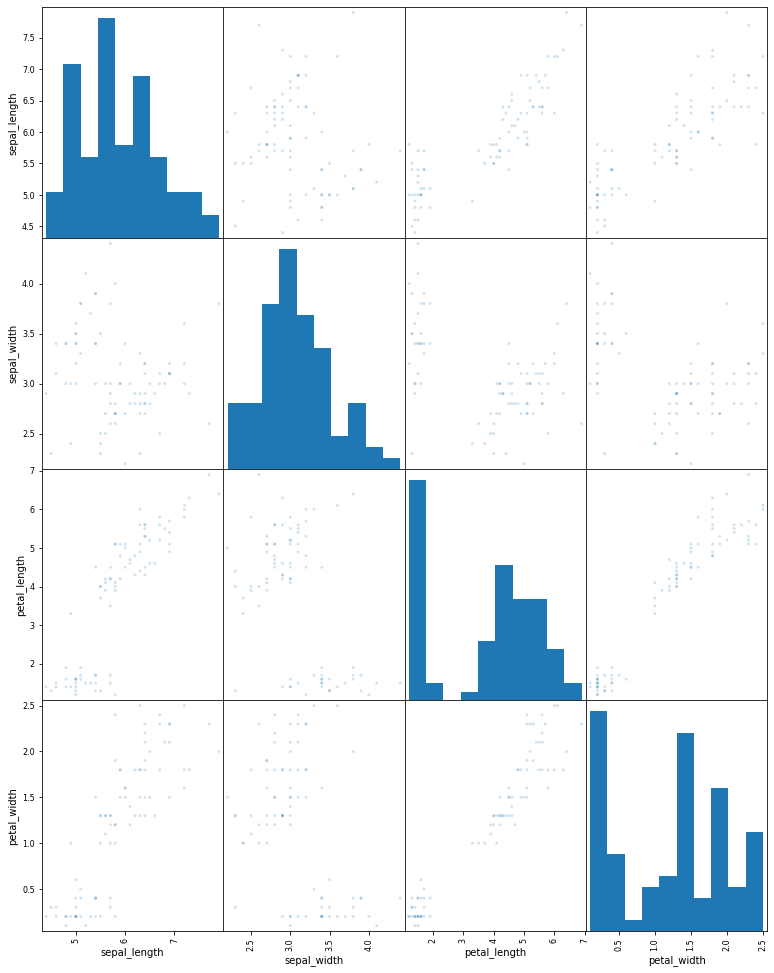

In [62]:

pd.plotting.scatter_matrix(i_train.drop(columns = ['species_versicolor', 'species_virginica']), alpha=0.2,  figsize=(13,17))

**- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.**

In [63]:
melt = i_train[['species','sepal_length', 'sepal_width', 'petal_length', 'petal_width']].melt(id_vars='species', var_name="measurement", value_name = "value")

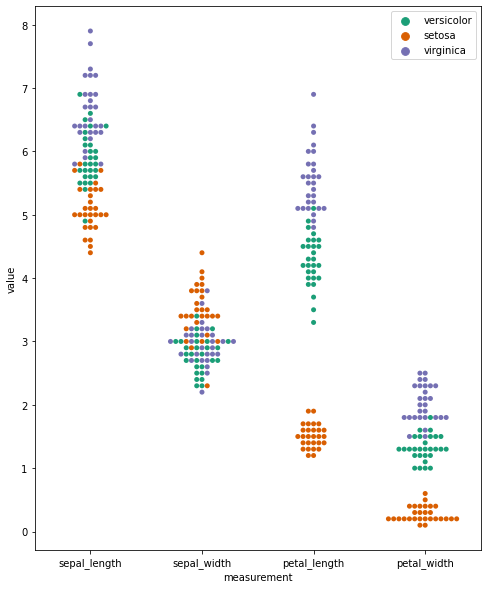

In [64]:
plt.figure(figsize=(8,10))
sns.swarmplot(x='measurement', y = 'value', data = melt, hue = 'species', palette = 'Dark2')
plt.legend()
plt.show()

**- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).**

- $H_{0}$: There is not a significant difference of the sepal area  virginica and setosa
- $H_{a}$: There is  a significant difference of the sepal area  virginica and setosa

In [65]:
#calculate the area
i_train['sepal_area'] = i_train.sepal_length * i_train.sepal_length

In [66]:
i_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica,sepal_area
79,5.7,2.6,3.5,1.0,versicolor,1,0,32.49
36,5.5,3.5,1.3,0.2,setosa,0,0,30.25
133,6.3,2.8,5.1,1.5,virginica,0,1,39.69
95,5.7,3.0,4.2,1.2,versicolor,1,0,32.49
18,5.7,3.8,1.7,0.3,setosa,0,0,32.49


In [67]:
#the area only for  virginica 
area_vir = i_train[i_train['species'] =='virginica'].sepal_area

In [68]:
#the area only for  setosa
area_set = i_train[i_train['species'] =='setosa'].sepal_area

<AxesSubplot:xlabel='species', ylabel='sepal_area'>

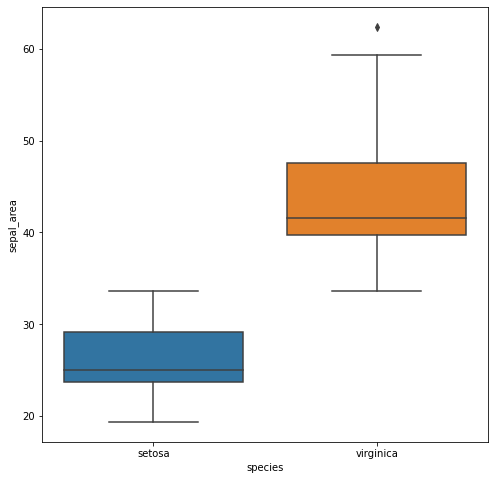

In [69]:
plt.figure(figsize=(8,8))
sns.boxplot(x ='species' , y='sepal_area', data=i_train[i_train['species'] != 'versicolor'])

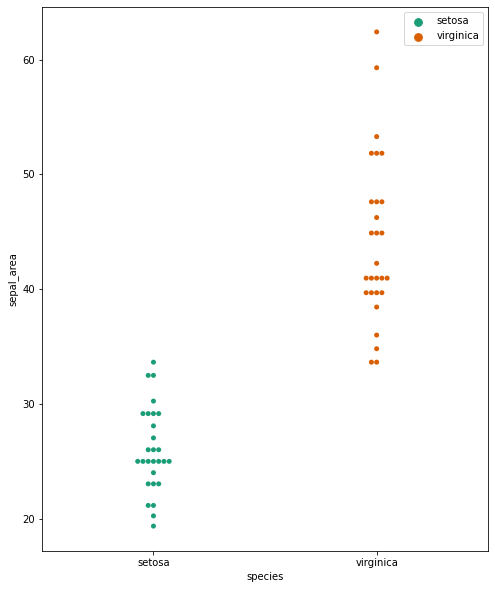

In [70]:
plt.figure(figsize=(8,10))
sns.swarmplot(x= 'species', y='sepal_area', data=i_train[i_train['species'] != 'versicolor'], hue = 'species', palette = 'Dark2')
plt.legend()
plt.show()

### T-test

Set Significance Level: $\alpha = .05$ (in other words Confidence level is 0.95)

Verify Assumptions:

Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
Independent samples
Equal Variances (or set method argument to False when not)
Compute test statistic and probability (t-statistic & p-value) using stats.ttest_ind

Decide.

In [71]:
#normal distribution 
len(area_vir),  len(area_set)

# there is not  more than 30 observations

(28, 28)

In [72]:
#variance
area_set.var(), area_vir.var()

(13.603476587301596, 52.102024735449746)

In [73]:
alpha = 0.05

t, p = stats.ttest_ind(area_set, area_vir, equal_var = False)

t, p, alpha

(-11.840338706008595, 1.1065956076309503e-14, 0.05)

In [74]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### mann-whitney 

The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.

- Fail to Reject $H_{0}$: Sample distributions are equal.
- Reject $H_{0}$: Sample distributions are not equal.

For the test to be effective, it requires at least 20 observations in each data sample. 

https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/


In [75]:
stats.mannwhitneyu(area_set,area_vir)

MannwhitneyuResult(statistic=1.0, pvalue=7.160315635686509e-11)

In [76]:
stat, p = stats.mannwhitneyu(area_set,area_vir)
stat, p

(1.0, 7.160315635686509e-11)

In [77]:

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1.000, p=0.000
Different distribution (reject H0)


The p-value strongly suggests that the sample distributions are different, as is expected.

**- Document takeaways and any actions.**